<a href="https://colab.research.google.com/github/MehediAhamed/vlmrun-cookbook/blob/remove-json-dump-error/notebooks/05_case_study_image_catalogue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align="center">
<p align="center" style="width: 100%;">
    <img src="https://raw.githubusercontent.com/vlm-run/.github/refs/heads/main/profile/assets/vlm-black.svg" alt="VLM Run Logo" width="80" style="margin-bottom: -5px; color: #2e3138; vertical-align: middle; padding-right: 5px;"><br>
</p>
<p align="center"><a href="https://docs.vlm.run"><b>Website</b></a> | <a href="https://docs.vlm.run/"><b>API Docs</b></a> | <a href="https://docs.vlm.run/blog"><b>Blog</b></a> | <a href="https://discord.gg/AMApC2UzVY"><b>Discord</b></a>
</p>
<p align="center">
<a href="https://discord.gg/AMApC2UzVY"><img alt="Discord" src="https://img.shields.io/badge/discord-chat-purple?color=%235765F2&label=discord&logo=discord"></a>
<a href="https://twitter.com/vlmrun"><img alt="Twitter Follow" src="https://img.shields.io/twitter/follow/vlmrun.svg?style=social&logo=twitter"></a>
</p>
</div>

Welcome to **[VLM Run Cookbooks](https://github.com/vlm-run/vlmrun-cookbook)**, a comprehensive collection of examples and notebooks demonstrating the power of structured visual understanding using the [VLM Run Platform](https://app.vlm.run).

## Case Study: Fashion Product Catalogue Analysis

This notebook demonstrates how to use VLM Run to analyze fashion product images and extract structured information including:
- Detailed product descriptions
- Product categories
- Target gender
- Seasonal classification

We'll use a sample dataset from the Fashion Product Images dataset to showcase VLM Run's retail product analysis capabilities.

### Environment Setup

To get started, install the VLM Run Python SDK and sign-up for an API key on the [VLM Run App](https://app.vlm.run).
- Store the VLM Run API key under the `VLMRUN_API_KEY` environment variable.

## Prerequisites

* Python 3.9+
* VLM Run API key (get one at [app.vlm.run](https://app.vlm.run))

## Setup

First, let's install the required packages:

In [1]:
! pip install vlmrun --upgrade --quiet
! pip install vlmrun-hub --upgrade --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.0/66.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.3/151.3 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 788.2/788.2 kB 26.3 MB/s eta 0:00:00


In [2]:
! pip install datasets --quiet

In [3]:
import os
import getpass

VLMRUN_BASE_URL = os.getenv("VLMRUN_BASE_URL", "https://api.vlm.run/v1")
VLMRUN_API_KEY = os.getenv("VLMRUN_API_KEY", None)
if VLMRUN_API_KEY is None:
    VLMRUN_API_KEY = getpass.getpass()

··········


Let's initialize the VLM Run Client

In [4]:
from vlmrun.client import VLMRun

vlm_client = VLMRun(base_url=VLMRUN_BASE_URL, api_key=VLMRUN_API_KEY)

### Load the dataset

Let's load the first 1% of the fashion dataset, and visualize the dataset.

In [5]:
from datasets import load_dataset


print(f"Loading fashion dataset...")
ds = load_dataset("ashraq/fashion-product-images-small", split=f"train[:10]")
print(f"Loaded {len(ds)} images successfully")
ds

Loading fashion dataset...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/867 [00:00<?, ?B/s]

data/train-00000-of-00002-6cff4c59f91661(…):   0%|          | 0.00/136M [00:00<?, ?B/s]

data/train-00001-of-00002-bb459e5ac5f01e(…):   0%|          | 0.00/135M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/44072 [00:00<?, ? examples/s]

Loaded 10 images successfully


Dataset({
    features: ['id', 'gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour', 'season', 'year', 'usage', 'productDisplayName', 'image'],
    num_rows: 10
})

Let's define an utility function for visualization

In [6]:
import pandas as pd

# Convert the dataset to a pandas dataframe
ds = ds.select_columns(["image", "productDisplayName", "gender", "masterCategory", "season"])
# Decode the image column and convert to PIL image
df = pd.DataFrame([{**row} for row in ds])
df

,image,productDisplayName,gender,masterCategory,season
0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,Turtle Check Men Navy Blue Shirt,Men,Apparel,Fall
1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,Peter England Men Party Blue Jeans,Men,Apparel,Summer
2,<PIL.Image.Image image mode=L size=60x80 at 0x...,Titan Women Silver Watch,Women,Accessories,Winter
3,<PIL.JpegImagePlugin.JpegImageFile image mode=...,Manchester United Men Solid Black Track Pants,Men,Apparel,Fall
4,<PIL.Image.Image image mode=RGB size=60x80 at ...,Puma Men Grey T-shirt,Men,Apparel,Summer
5,<PIL.JpegImagePlugin.JpegImageFile image mode=...,Inkfruit Mens Chain Reaction T-shirt,Men,Apparel,Summer
6,<PIL.JpegImagePlugin.JpegImageFile image mode=...,Fabindia Men Striped Green Shirt,Men,Apparel,Summer
7,<PIL.Image.Image image mode=RGB size=60x80 at ...,Jealous 21 Women Purple Shirt,Women,Apparel,Summer
8,<PIL.Image.Image image mode=RGB size=60x80 at ...,Puma Men Pack of 3 Socks,Men,Accessories,Summer
9,<PIL.Image.Image image mode=RGB size=60x80 at ...,Skagen Men Black Watch,Men,Accessories,Winter


### Image -> JSON with VLM Run


Now, let's call the VLM Run API to get the predictions for the dataframe using the `vlm_client.image.generate` method. In this example, we'll use the `retail.product-catalog` domain to get the predictions.

In [7]:
# Define a function to get predictions for an image from the VLM Run API
def get_predictions(image):
    """Generate predictions for an image using the VLM Run API."""
    try:
        response = vlm_client.image.generate(
            images=[image],
            domain="retail.product-catalog"
        )
        return response.response
    except Exception as e:
        print(f"Error getting predictions for image: {e}")
        return None

# Apply the get_predictions function to the dataframe
df_response = df.assign(
    response=df["image"].apply(lambda image: get_predictions(image))
)
df_response

,image,productDisplayName,gender,masterCategory,season,response
0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,Turtle Check Men Navy Blue Shirt,Men,Apparel,Fall,{'description': 'A young man models a short-sl...
1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,Peter England Men Party Blue Jeans,Men,Apparel,Summer,{'description': 'This image features a pair of...
2,<PIL.Image.Image image mode=L size=60x80 at 0x...,Titan Women Silver Watch,Women,Accessories,Winter,"{'description': 'A sleek, silver-toned wristwa..."
3,<PIL.JpegImagePlugin.JpegImageFile image mode=...,Manchester United Men Solid Black Track Pants,Men,Apparel,Fall,{'description': 'A pair of black track pants i...
4,<PIL.Image.Image image mode=RGB size=60x80 at ...,Puma Men Grey T-shirt,Men,Apparel,Summer,{'description': 'The image features a man wear...
5,<PIL.JpegImagePlugin.JpegImageFile image mode=...,Inkfruit Mens Chain Reaction T-shirt,Men,Apparel,Summer,{'description': 'A smiling man is wearing a li...
6,<PIL.JpegImagePlugin.JpegImageFile image mode=...,Fabindia Men Striped Green Shirt,Men,Apparel,Summer,"{'description': 'A man models a long-sleeved, ..."
7,<PIL.Image.Image image mode=RGB size=60x80 at ...,Jealous 21 Women Purple Shirt,Women,Apparel,Summer,{'description': 'The image displays a woman we...
8,<PIL.Image.Image image mode=RGB size=60x80 at ...,Puma Men Pack of 3 Socks,Men,Accessories,Summer,{'description': 'The image features a multi-pa...
9,<PIL.Image.Image image mode=RGB size=60x80 at ...,Skagen Men Black Watch,Men,Accessories,Winter,{'description': 'A black minimalist watch feat...


In [9]:
# Let's explode the response column into a dataframe and display the predictions dataframe
pd.set_option("display.max_colwidth", None)
df_response_json = df_response["response"].apply(lambda x: x if x is not None else None)
df_response_json = pd.concat([df_response[["image"]], pd.json_normalize(df_response_json)], axis=1)
df_response_json


,image,description,category,season,gender
0,<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=60x80 at 0x797294151C10>,"A young man models a short-sleeved plaid shirt featuring blue and white squares, paired with dark jeans. The collared shirt has a casual, open neckline.",Apparel,summer,men
1,<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=60x80 at 0x7972943E2B40>,"This image features a pair of classic dark blue denim jeans, exhibiting a slightly faded wash and a straight-leg fit. They are worn by a person, paired with a plain grey t-shirt and dark shoes, against a clean white background.",Apparel,fall,men
2,<PIL.Image.Image image mode=L size=60x80 at 0x7972B202B7D0>,"A sleek, silver-toned wristwatch features a round white dial with minimal markings and a delicate mesh strap. This elegant timepiece is designed for a refined and contemporary aesthetic.",accessories,spring,women
3,<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=60x80 at 0x797294155820>,"A pair of black track pants is displayed, featuring a subtle orange emblem on the upper right leg. These relaxed-fit trousers are suitable for athletic or casual wear, as suggested by their pairing with an orange top and sneakers.",Apparel,spring,men
4,<PIL.Image.Image image mode=RGB size=60x80 at 0x7972941577A0>,The image features a man wearing a grey short-sleeved polo shirt with a collar and a two-button placket. The shirt has a small white logo on the left chest area.,apparel,summer,men
5,<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=60x80 at 0x7972941570E0>,A smiling man is wearing a light grey short-sleeved t-shirt with a colorful graphic design on the chest. The graphic design is multi-colored and prominently displayed on the front.,apparel,summer,men
6,<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=60x80 at 0x797294157080>,"A man models a long-sleeved, muted green casual shirt with a collar and rolled-up sleeves. He is also wearing blue jeans, presenting a relaxed and comfortable style suitable for everyday wear.",Shirt,fall,men
7,<PIL.Image.Image image mode=RGB size=60x80 at 0x797294157B60>,"The image displays a woman wearing a dark reddish-purple, short-sleeved shirt featuring a collared v-neck design. She is also wearing blue jeans, presenting a casual look.",apparel,summer,women
8,<PIL.Image.Image image mode=RGB size=60x80 at 0x7972941585C0>,"The image features a multi-pack of three pairs of athletic crew socks in solid colors: black, gray, and navy blue. Each sock is adorned with a small white embroidered logo near the ribbed cuff.",Socks,fall,men
9,<PIL.Image.Image image mode=RGB size=60x80 at 0x797294158890>,"A black minimalist watch featuring a round black dial with subtle black hour markers and a matching black silicone strap. This timepiece offers a sleek, monochromatic design suitable for a variety of occasions.",Watches,fall,men


Now, let's define a few utilities for rendering the dataframe with images / tags.

In [10]:
from IPython.display import HTML, display
from vlmrun.common.image import encode_image

style = """
<style>
    .tag {
        padding: 4px 8px;
        border-radius: 4px;
        font-size: 12px;
        background: #f0f0f0;
        color: #666;
        font-weight: 300;
    }
</style>
"""

formatters = {
    "image": lambda x: f"<img src='{encode_image(x, format='JPEG')}' width='100'>",
    "category": lambda x: f"<span class='tag'>{x}</span>",
    "season": lambda x: f"<span class='tag'>{x}</span>",
    "gender": lambda x: f"<span class='tag'>{x}</span>",
}

Display the dataframe with images and VLM Run predictions.

,image,description,category,season,gender
0,,"A young man models a short-sleeved plaid shirt featuring blue and white squares, paired with dark jeans. The collared shirt has a casual, open neckline.",Apparel,summer,men
1,,"This image features a pair of classic dark blue denim jeans, exhibiting a slightly faded wash and a straight-leg fit. They are worn by a person, paired with a plain grey t-shirt and dark shoes, against a clean white background.",Apparel,fall,men
2,,"A sleek, silver-toned wristwatch features a round white dial with minimal markings and a delicate mesh strap. This elegant timepiece is designed for a refined and contemporary aesthetic.",accessories,spring,women
3,,"A pair of black track pants is displayed, featuring a subtle orange emblem on the upper right leg. These relaxed-fit trousers are suitable for athletic or casual wear, as suggested by their pairing with an orange top and sneakers.",Apparel,spring,men
4,,The image features a man wearing a grey short-sleeved polo shirt with a collar and a two-button placket. The shirt has a small white logo on the left chest area.,apparel,summer,men
5,,A smiling man is wearing a light grey short-sleeved t-shirt with a colorful graphic design on the chest. The graphic design is multi-colored and prominently displayed on the front.,apparel,summer,men
6,,"A man models a long-sleeved, muted green casual shirt with a collar and rolled-up sleeves. He is also wearing blue jeans, presenting a relaxed and comfortable style suitable for everyday wear.",Shirt,fall,men
7,,"The image displays a woman wearing a dark reddish-purple, short-sleeved shirt featuring a collared v-neck design. She is also wearing blue jeans, presenting a casual look.",apparel,summer,women
8,,"The image features a multi-pack of three pairs of athletic crew socks in solid colors: black, gray, and navy blue. Each sock is adorned with a small white embroidered logo near the ribbed cuff.",Socks,fall,men
9,,"A black minimalist watch featuring a round black dial with subtle black hour markers and a matching black silicone strap. This timepiece offers a sleek, monochromatic design suitable for a variety of occasions.",Watches,fall,men

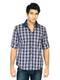
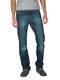
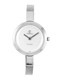
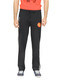
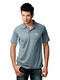
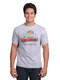
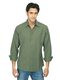
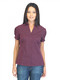
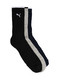
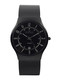

In [11]:
display(HTML(style + df_response_json.to_html(formatters=formatters, escape=False)))

## Additional Resources
- [VLM Run Documentation](https://docs.vlm.run)
- [API Reference](https://docs.vlm.run/)
- [More Examples](https://github.com/vlm-run/vlmrun-cookbook)
- [Fashion Dataset](https://huggingface.co/datasets/ashraq/fashion-product-images-small)